# Kernel Density Estimation

A KDE model is an average of the Kernel functions at individual data points.

KDE with Gaussian Kernels is a mixture consisting of one Gaussian component *per data point*, resulting in an essentially non-parametric estimator of density.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## KDE on 1D data

In [2]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

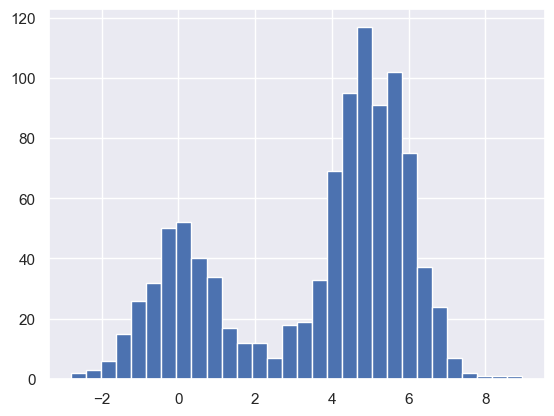

In [3]:
hist = plt.hist(x, bins=30)

In [4]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

391.7229234728167

Define a KDE model using Gaussian kernels

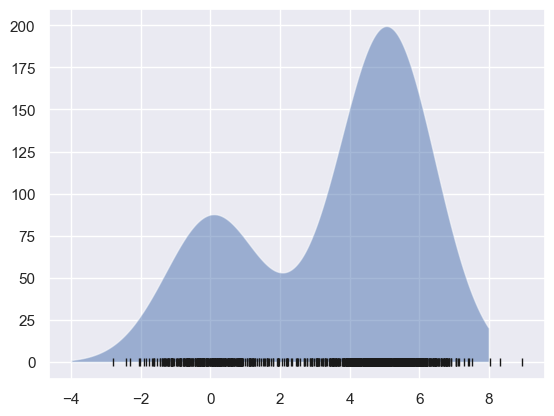

In [5]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

## KDE in sk-learn

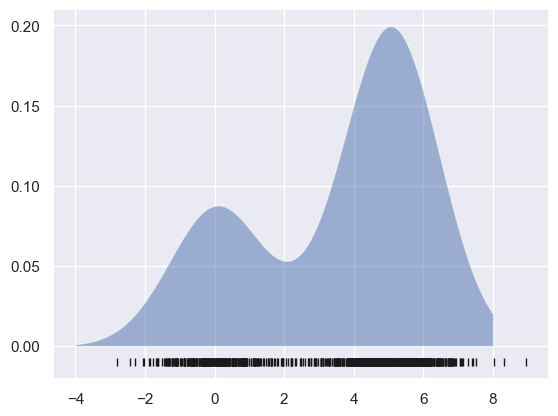

In [6]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=1.0, kernel='gaussian')
model.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = model.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

The result here is normalized such that the area under the curve is equal to 1.

### Selecting the bandwidth via cross-validation

cross-validation will be explained in some future lectures. Here, we use it as a magic method.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
#very slow
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(x[:, None]);

Now we can find the choice of bandwidth which maximizes the log-likelihood (i.e., minimize NLL)

In [8]:
grid.best_params_

{'bandwidth': 0.35111917342151316}

redo using the best bandwidth

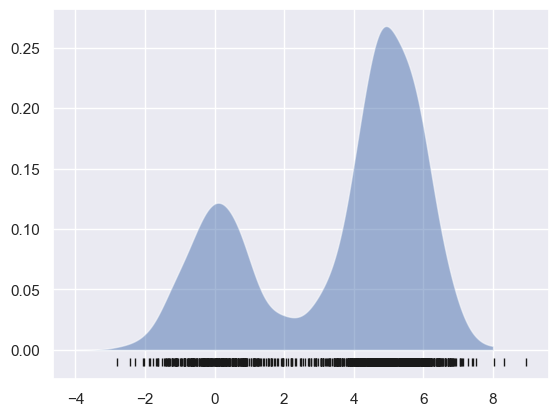

In [9]:
model = KernelDensity(bandwidth=grid.best_params_['bandwidth'], kernel='gaussian')
model.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = model.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

## KDE on the Iris Dataset
Iris dataset contains 3 classes, and each class has 50 samples

A class refers to a type of iris plant.

A data sample has 4 features/attributes: 'Sepal_Length', 'Sepal_Width', 'Patal_Length', 'Petal_Width'

https://www.quora.com/How-do-petals-differ-from-sepals

In [10]:
from sklearn import datasets
import pandas as pd

In [11]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=['Sepal_Length',
                      'Sepal_Width', 'Patal_Length', 'Petal_Width'])
iris_df.head()

,Sepal_Length,Sepal_Width,Patal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
# 150 data samples
iris_df.shape

(150, 4)

In [13]:
# each sample is in one of the 3 classes
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
iris_df['Target'] = iris.target
# the name of class-0 is 'Iris_Setosa'
iris_df['Target']=iris_df['Target'].replace([0], 'class-0')
# the name of class-1 is 'Iris_Vercicolor'
iris_df['Target']=iris_df['Target'].replace([1], 'class-1')
# the name of class-2 is 'Iris_Virginica'
iris_df['Target']=iris_df['Target'].replace([2], 'class-2')

In [15]:
x_sl=iris_df.loc[(iris_df['Target']=='class-2'), 'Sepal_Length']
x_sl=x_sl.values
# Sepal_Length in class-2
x_sl

array([6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8,
       5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2,
       6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. ,
       6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

use KernelDensity in sk-learn to build a KDE model

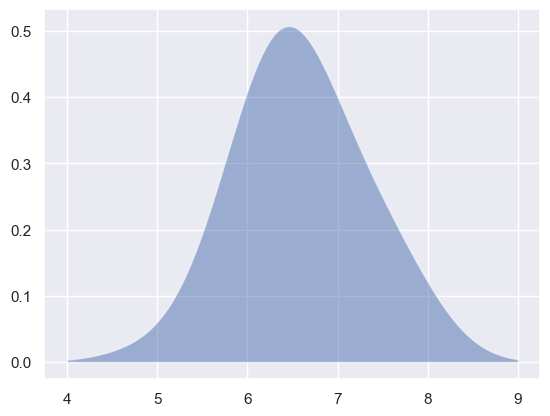

In [16]:
model = KernelDensity(bandwidth=0.5, kernel='gaussian')
model.fit(x_sl[:, None])
# score_samples returns the log of the probability density
x_d = np.linspace(4, 9, 100000)
logprob = model.score_samples(x_d[:, None])
prob=np.exp(logprob)
plt.fill_between(x_d, prob, alpha=0.5)

Use the kdeplot in ssn to show the pdf of class-2

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

Text(0, 0.5, 'Probability Density')

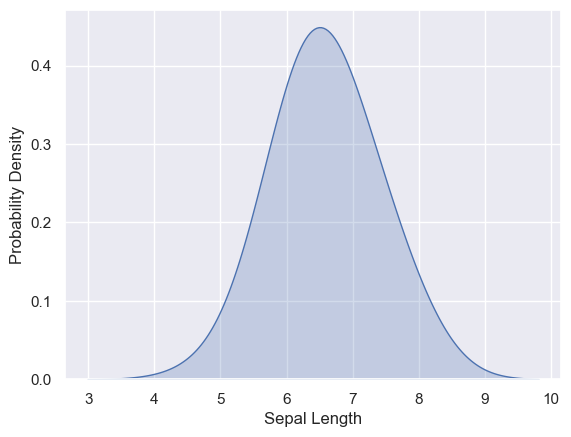

In [17]:
#bw_method=1 means bandwidth=1
sns.kdeplot(x_sl, color='b', fill=True, bw_method=1)
plt.xlabel('Sepal Length')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

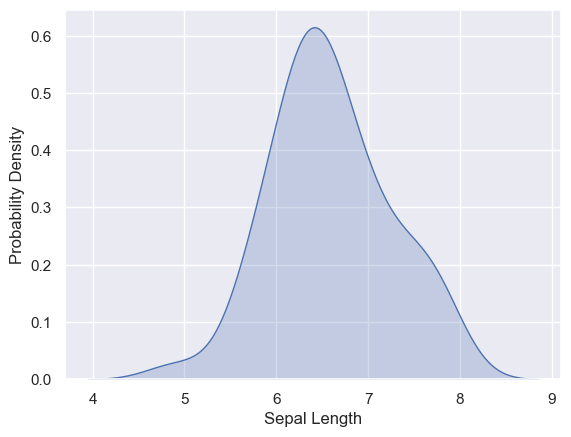

In [18]:
sns.kdeplot(x_sl, color='b', fill=True, bw_method=0.5)
plt.xlabel('Sepal Length')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

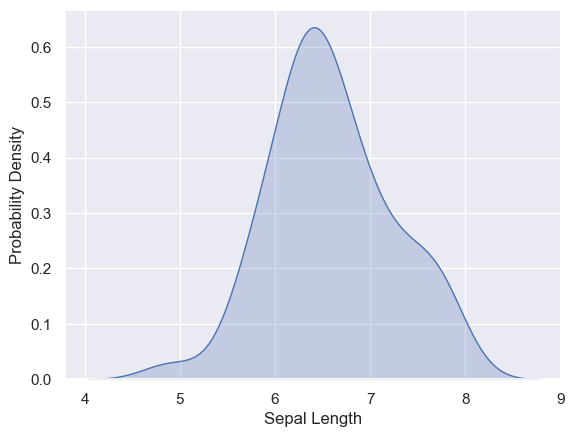

In [19]:
#use the default method to compute bandwidth
#https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.gaussian_kde.html#scipy.stats.gaussian_kde
a=sns.kdeplot(x_sl, color='b', fill=True)
plt.xlabel('Sepal Length')
plt.ylabel('Probability Density')

a KDE model is a pdf of a class

we build KDE models of the 3 classes

Text(0, 0.5, 'Probability Density')

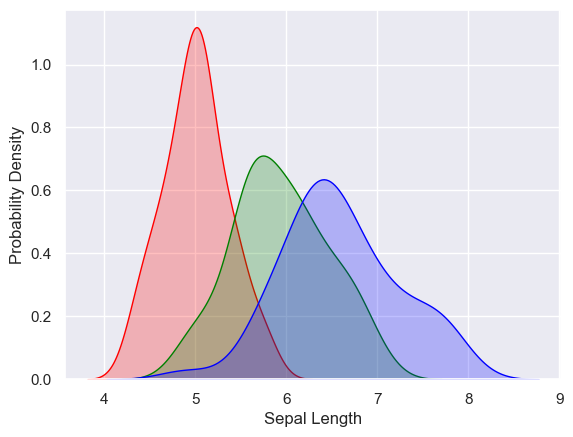

In [20]:
# Plotting the KDE Plot
sns.kdeplot(iris_df.loc[(iris_df['Target']=='class-0'),
            'Sepal_Length'], color='red', fill=True)

sns.kdeplot(iris_df.loc[(iris_df['Target']=='class-1'), 
            'Sepal_Length'], color='green', fill=True)

sns.kdeplot(iris_df.loc[(iris_df['Target']=='class-2'), 
            'Sepal_Length'], color='blue', fill=True)

plt.xlabel('Sepal Length')
plt.ylabel('Probability Density')

In [21]:
class0 = iris_df.query("Target=='class-0'")
class1 = iris_df.query("Target=='class-1'")
class2 = iris_df.query("Target=='class-2'")

In [22]:
class0.head()

,Sepal_Length,Sepal_Width,Patal_Length,Petal_Width,Target
0,5.1,3.5,1.4,0.2,class-0
1,4.9,3.0,1.4,0.2,class-0
2,4.7,3.2,1.3,0.2,class-0
3,4.6,3.1,1.5,0.2,class-0
4,5.0,3.6,1.4,0.2,class-0


In [23]:
class1.head()

,Sepal_Length,Sepal_Width,Patal_Length,Petal_Width,Target
50,7.0,3.2,4.7,1.4,class-1
51,6.4,3.2,4.5,1.5,class-1
52,6.9,3.1,4.9,1.5,class-1
53,5.5,2.3,4.0,1.3,class-1
54,6.5,2.8,4.6,1.5,class-1


In [24]:
class2.head()

,Sepal_Length,Sepal_Width,Patal_Length,Petal_Width,Target
100,6.3,3.3,6.0,2.5,class-2
101,5.8,2.7,5.1,1.9,class-2
102,7.1,3.0,5.9,2.1,class-2
103,6.3,2.9,5.6,1.8,class-2
104,6.5,3.0,5.8,2.2,class-2


We build a KDE model using 2D data samples: each has two features: 'Sepal_Length' and 'Sepal_Width'

<Axes: xlabel='Sepal_Length', ylabel='Sepal_Width'>

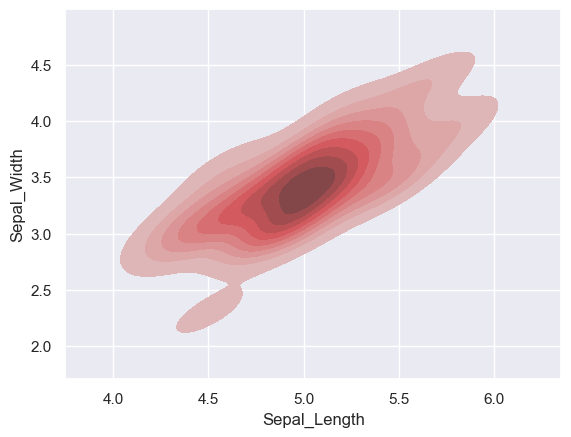

In [25]:
# Plotting the KDE Plot
sns.kdeplot(x=class0['Sepal_Length'],  y=class0['Sepal_Width'], color='r', fill=True)

<Axes: xlabel='Sepal_Length', ylabel='Sepal_Width'>

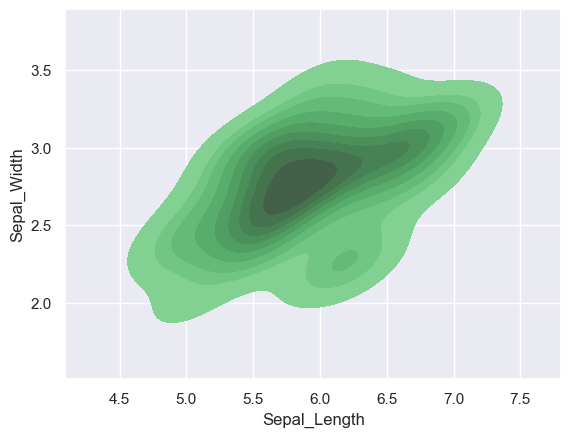

In [26]:
sns.kdeplot(x=class1['Sepal_Length'],  y=class1['Sepal_Width'], color='g', fill=True)

<Axes: xlabel='Sepal_Length', ylabel='Sepal_Width'>

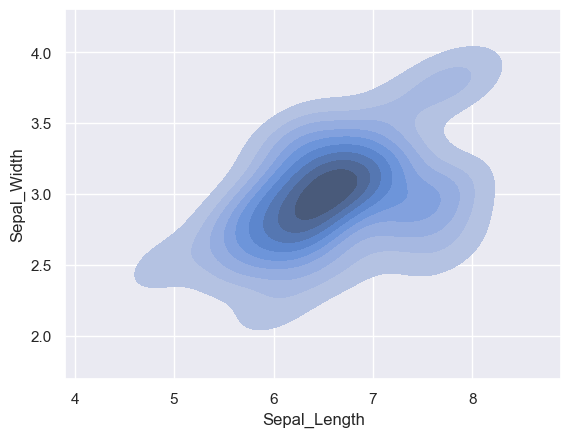

In [27]:
sns.kdeplot(x=class2['Sepal_Length'],  y=class2['Sepal_Width'], color='b', fill=True)

<Axes: xlabel='Sepal_Length', ylabel='Sepal_Width'>

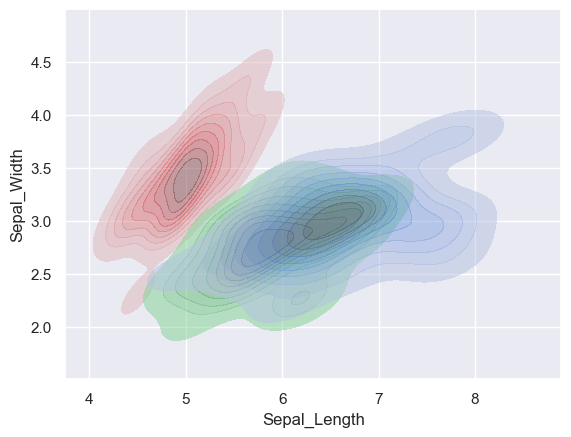

In [28]:
sns.kdeplot(x=class0['Sepal_Length'],  y=class0['Sepal_Width'], color='r', fill=True, alpha=0.5)
sns.kdeplot(x=class1['Sepal_Length'],  y=class1['Sepal_Width'], color='g', fill=True, alpha=0.5)
sns.kdeplot(x=class2['Sepal_Length'],  y=class2['Sepal_Width'], color='b', fill=True, alpha=0.5)

KDE is easy to use as long as we have a large number of samples